### Question 1

In [1]:
from scipy import stats
import numpy as nupy
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
from numpy import cov
from statsmodels.graphics.tsaplots import acf
from scipy.stats import pearsonr
from scipy.special import stdtr
from tabulate import tabulate

### Question 1

In [2]:
#H0 : population mean is equal to 7725
#H1 : population mean is not equal to 7725

women = [5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770]
sample_mean = 7725
a = 0.5
d_freedom = len(women)- 1
mean = statistics.mean(women)
st_dev = statistics.stdev(women)
sem_women = st_dev/math.sqrt(len(women))
t_stat, p_value = stats.ttest_1samp(women,popmean = sample_mean)

#tabulate   
head = ["Degree of freedom", "Mean","Standard Deviation","SEM", "T_Statistic","p-Value"]
stats = [(d_freedom,mean,st_dev,sem_women,t_stat,p_value)]
print(tabulate(stats, headers=head, tablefmt="grid")) 
print()

if t_stat <= sample_mean:
    print("The null hypothesis(H0: population mean = 7725) is rejected")
else:
    print("The alternative hypothesis is accepted")


+---------------------+---------+----------------------+---------+---------------+-----------+
|   Degree of freedom |    Mean |   Standard Deviation |     SEM |   T_Statistic |   p-Value |
+=====================+=========+======================+=========+===============+===========+
|                  10 | 6753.64 |              1142.12 | 344.363 |      -2.82075 | 0.0181372 |
+---------------------+---------+----------------------+---------+---------------+-----------+

The null hypothesis(H0: population mean = 7725) is rejected


### Question 2

In [3]:

#H0: ireland mean = elsewhere mean 
#H1: ireland mean > elsewhere mean 
#right tailed
#2 sampled test


#statistics
a_size = 42
b_size = 61

a_mean = 74
b_mean = 57

a_std = 7.4
b_std = 7.1

alpha = 0.05

#degree of freedom
df1 = 42-1
df2 = 61-1
d_freedom = (df1 + df2)


t_value = (a_mean - b_mean) / np.sqrt(a_std**2/a_size + b_std**2/b_size)

p_value = 2*stdtr(d_freedom, -np.abs(t_value))


print("t_statistic = ",t_value)
print("p-value is",p_value)


t_statistic =  11.647653131319812
p-value is 2.191034056528894e-20


### Question 3

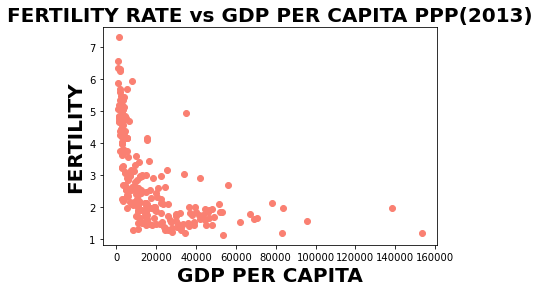

In [4]:
#GDP data
GDP = pd.ExcelFile("GDP_PPP.xls")
gdp_sheets = GDP.sheet_names
dt_gdp = pd.read_excel(GDP,"Data",skiprows = 3)
data_gdp = dt_gdp[["Country Name","2013"]]

#Fertility rates data
fertility_rates = pd.ExcelFile("fertility_rates.xls")
fertility_sheets = fertility_rates.sheet_names
dt_fertility = pd.read_excel(fertility_rates,"Data",skiprows=3)
data_fertility = dt_fertility[["Country Name","2013"]]

#plotting data
gdp_fertility = pd.merge(data_gdp,data_fertility, on = ("Country Name"))
gdp_fertility = gdp_fertility.rename({"2013_x":"gdp2013","2013_y":"fert2013"},axis="columns")
gdp_fertility.dropna(inplace=True)

#plotting
plt.scatter(gdp_fertility.gdp2013,gdp_fertility.fert2013, color = "salmon")
plt.title("FERTILITY RATE vs GDP PER CAPITA PPP(2013)", fontdict={"fontsize":20},fontweight="bold")   
plt.xlabel("GDP PER CAPITA", fontdict={"fontsize":20},fontweight="bold")
plt.ylabel("FERTILITY", fontdict={"fontsize":20},fontweight="bold")
plt.rcParams["figure.figsize"]=(15,8)
plt.show()



In [5]:
#calculating correlation
corr,y_val = pearsonr(gdp_fertility.gdp2013, gdp_fertility.fert2013)
print("Pearsons correlation: %.3f" %corr)


Pearsons correlation: -0.527


### Question 4

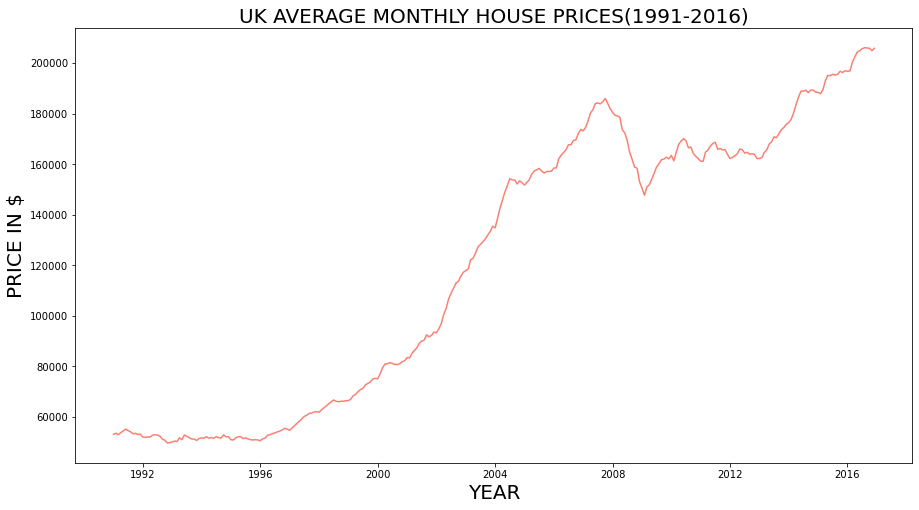

In [6]:
housing_price = pd.read_excel("HPI_Monthly.xls", index_col=0)
housing_price = housing_price.rename({"Average House Price":"Average_Price"},axis = "columns")

#drop years after 2016
data_housing = housing_price.iloc[:312,:]

#plotting
plt.plot(data_housing.index, data_housing.Average_Price, color = "salmon")
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams['font.size'] = '12'
plt.title("UK AVERAGE MONTHLY HOUSE PRICES(1991-2016)", fontdict={"fontsize":20})   
plt.xlabel("YEAR", fontdict={"fontsize":20})
plt.ylabel("PRICE IN $", fontdict={"fontsize":20})
plt.rcParams["figure.figsize"]=(15,8)
plt.show()

#### Question 4 part b

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


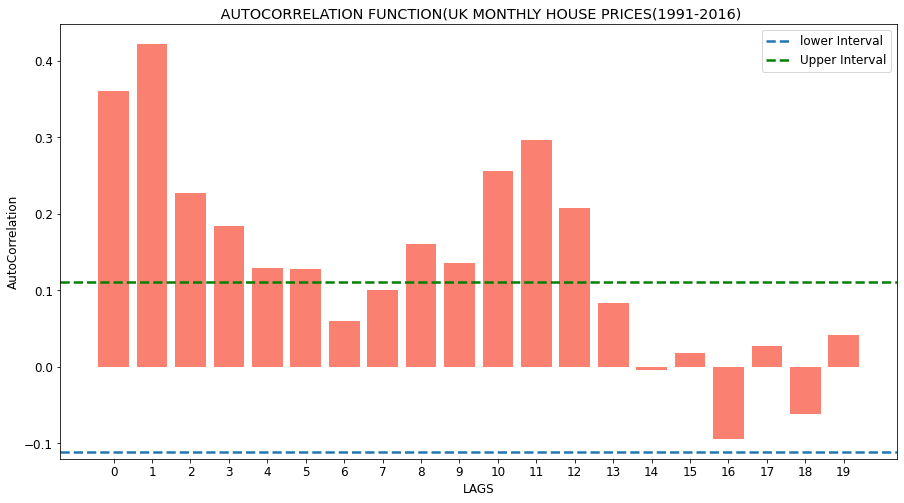

In [7]:

#acfdata
acf_data = data_housing["Average_Price"]/data_housing["Average_Price"].shift(1)-1
acf_data.dropna(inplace=True)


#acf plot data
plot_acf = acf(acf_data, nlags = 20)
acf_clean = plot_acf[1:] 
x_val = range(len(acf_clean))

#confidenceintervals
lower_bound = -1.96/(math.sqrt(len(acf_data)))
upper_bound = 1.96/(math.sqrt(len(acf_data)))


#plotting
plt.bar(x_val, acf_clean, color = "salmon")
plt.axhline(lower_bound,ls ="--",lw=2.5, label = "lower Interval")
plt.axhline(upper_bound,c = "green", ls ="--",lw=2.5, label = "Upper Interval")
plt.xticks(x_val)
plt.gca().update(dict(title=" AUTOCORRELATION FUNCTION(UK MONTHLY HOUSE PRICES(1991-2016)",xlabel="LAGS",ylabel="AutoCorrelation"))
plt.rcParams["figure.figsize"]=(15,8)
plt.legend()
plt.show()





In [8]:
#annualized return
def annualized_returns(series):
    count_months = len(series)
    annual_return=series.add(1).prod() ** (12 /count_months) - 1
    return annual_return * 100 #as percentage
print("The annualized return rate is {:.3f}".format(annualized_returns(acf_data)),"%")


The annualized return rate is 5.372 %


### Question 5

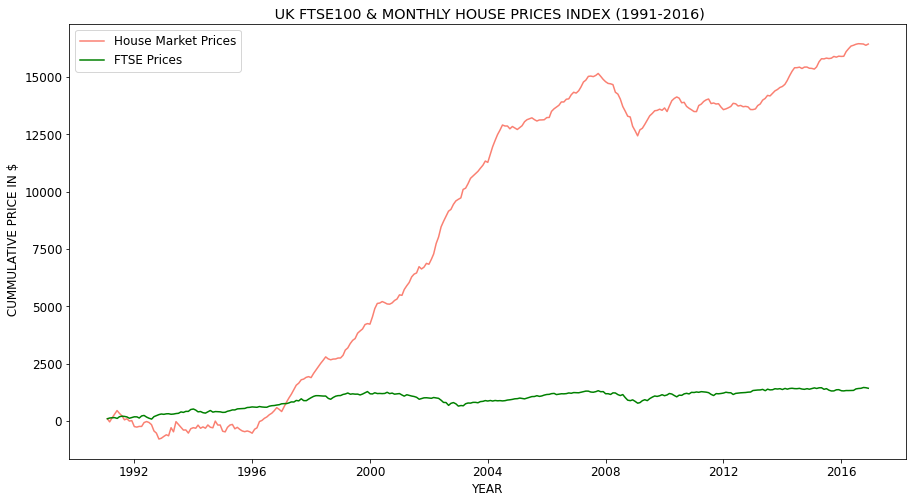

In [9]:
#ftse data
FTSE = pd.read_csv("FTSE100.csv")
FTSE["Date"] = pd.to_datetime(FTSE.Date)
FTSE.set_index("Date", inplace = True)
FTSE.sort_values(by=['Date'], inplace=True, ascending=True)
ftse_data = FTSE[["Adj Close"]]
ftse_data = ftse_data.rename({"Adj Close":"AdjClose"}, axis = "columns")


#housing data
housing = pd.read_excel("HPI_Monthly.xls", index_col=0)
data_housing = housing[["Average House Price"]]
data_housing = data_housing.rename({"Average House Price":"Average_Price"},axis = "columns")
data_housing = data_housing.iloc[:312,:]
data_housing.dropna(inplace=True)


#monthly return
ftse_data["Month_Closing"] = ftse_data["AdjClose"]/ftse_data["AdjClose"].shift(1)-1
data_housing["Month_Closing"] = data_housing["Average_Price"]/data_housing["Average_Price"].shift(1)-1

#cummulative sum 
ftse_data["ftse_Monthly"] = ftse_data["Month_Closing"].cumsum()
data_housing["house_Monthly"] = data_housing["Month_Closing"].cumsum()

#normalization
data_housing["house_Normalized"] = round(data_housing["house_Monthly"]*(100/0.008390))
ftse_data["ftse_Normalized"] =round(ftse_data["ftse_Monthly"] *(100/0.097037))


#plotting
plt.plot(data_housing.index,data_housing.house_Normalized, label = "House Market Prices", color = "salmon")
plt.plot(ftse_data.index, ftse_data.ftse_Normalized, label ="FTSE Prices", color ="Green")
plt.gca().update(dict(title=" UK FTSE100 & MONTHLY HOUSE PRICES INDEX (1991-2016)",xlabel="YEAR",ylabel=" CUMMULATIVE PRICE IN $"))
plt.rcParams["figure.figsize"]=(15,8)
plt.legend()
plt.show()


In [10]:
#annualized return
def annualized_returns(series):
    months = len(series)
    annual_return=series.add(1).prod() ** (12 /months) - 1
    return annual_return * 100 #*100 to convert to a percentage

print("The annualized return rate is {:.3f}".format(annualized_returns(ftse_data["Month_Closing"])),"%")



The annualized return rate is 4.463 %
